Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [15]:
NAME = "Aisse Torres Torres"
COLLABORATORS = "Bruna Costa"

---

In [16]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt
import math 

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 5:  Numerical Differentiation and Quadrature

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [17]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    
    h = b - a
    I = f(a) * h

    return I
    
def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    
    h = b - a
    I = h * f(a + h/2.)
    
    return I
    
    
def I_trapezoid(f, a, b):
    """ Newton-Cotes Trapezoid rule"""
    
    h = b - a
    I = h/2. * (f(a) + f(b))
    
    return I
    
def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule"""
    
    h = b - a 
    w = numpy.array([1./3., 4./3., 1./3.])
    xi = numpy.array([-1., 0., 1.])
    x = lambda xi: h/2. * xi + (b + a)/2.
    I = h/2. * numpy.sum(w * f(x(xi)))
    
    return I


    

In [18]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculates the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

Find roots of $P_3(x)$

    Set inequality for roots: 

$$ \frac{1}{2}(5x^3 - 3x) = 0 $$

$$ 5x^3 - 3x = 0 $$

$$ x(5x^2 - 3) = 0 $$

    From here, we know x = 0 is a root 
    
$$ 5x^2 = 3 $$

$$ x^2 = \frac{3}{5} $$

$$ x = \pm \sqrt{\frac{3}{5}} $$

Therefore the roots $x_1, x_2, x_3$ are $ -\sqrt{\frac{3}{5}}, 0, \sqrt{\frac{3}{5}} $ respectively. 

Now we can find the weights:

$$ c_1 = \frac{2}{(1 - x_0^2)(P_3'(x_1))} = \frac{2}{(\frac{2}{5})(9)} = \frac{5}{9} $$

$$ c_2 = \frac{2}{(1 - x_1^2)(P_3'(x_2))} = \frac{2}{(\frac{9}{4})} = \frac{8}{9} $$

$$ c_3 = \frac{2}{(1 - x_3^2)(P_3'(x_3))} = \frac{2}{(\frac{2}{5})(9)} = \frac{5}{9} $$



Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [19]:
def I_GL3(f, a, b):
    """ 3 point Gauss-Legendre Quadrature rule"""
    
    h = b - a
    weights = numpy.array([5/9., 8/9., 5/9.])
    roots = numpy.array([-numpy.sqrt(3./5.), 0., numpy.sqrt(3./5.)])
    x = lambda roots: h / 2. * roots + (b + a) / 2.
    I = h / 2. * numpy.sum(weights * f(x(roots)))
    
    return I

    

In [20]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [21]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx
        
    """
    
    panels = numpy.linspace(a, b, N + 1)
    I = 0
    for n in range(N):
        I += method(f, panels[n], panels[n + 1])
        
    return I
        

In [22]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).

This function should  make a beautiful log-log plot showing the convergence behavior of the *relative error* with respect to 

$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$

for all the different quadrature rules for 

$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

remember to label all the curves with the methods.

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


**Extra Credit** the rate of convergence of any scheme can be written as

$$
    |e| = C\Delta x^p
$$

For each method calculate $C$ and $p$ and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend). 

In [23]:
def plot_quad_convergence(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    
    h = (b - a) / numpy.array(N)
    err = numpy.zeros(h.shape)
    
    fig = plt.figure(figsize=(10, 8))
    axes = fig.add_subplot(1, 1, 1)
    
    cycle = plt.rcParams['axes.prop_cycle']
    colors = cycle.by_key()['color']
    
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    
    for m, method in enumerate(methods):
        name = method.__name__
        for i, n in enumerate(N):
            I = quadN(f, 0., x, n, method = method)
            err[i] = numpy.abs(I - I_true) / numpy.abs(I_true)
            if name is not 'I_GL3':
                nMax = len(N)
            else:
                nMax = 7        
        
        p = numpy.polyfit(numpy.log(h[:nMax]), numpy.log(err[:nMax]), 1)
        fit_err = numpy.exp(p[1]) * h ** p[0]
        
        axes.loglog(h, err, 'o', color = colors[m], label = '{}, p = {:.2f}'.format(name, p[0]))
        axes.loglog(h, fit_err, '--', color = colors[m])
        
    axes.set_xlabel('$\Delta x$')
    axes.set_ylabel('relative error')
    axes.legend()
    
    if title is not None:
        axes.set_title(title)
    
    plt.show()
    
    

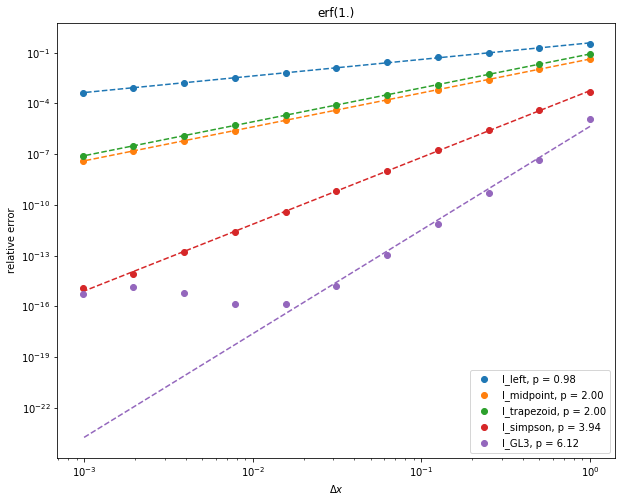

In [24]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of function evaluations required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


The graph for mid-point seems to point to needing around 1024 function evalutations.

The graph for simpson points to needing 24 function evaluations. 

Meanwhile, it looks like GL Quadrature will take around 192 function evaluations. 

## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

The problematic points will be when $x = 0$. This is because when $x = 0$ the functions $c$ and $s$ are discontinuous. 

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [25]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


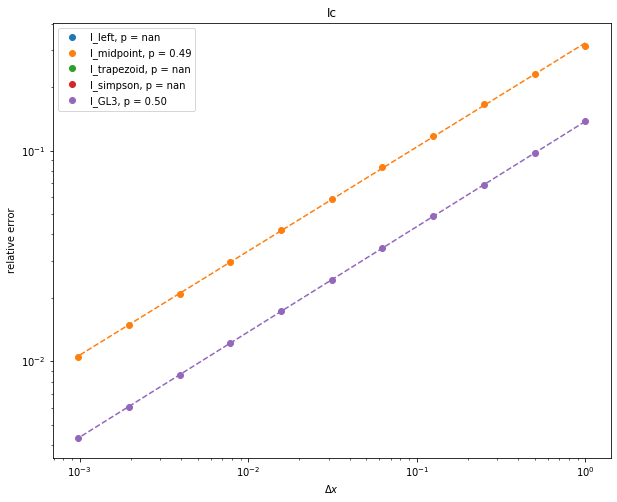

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


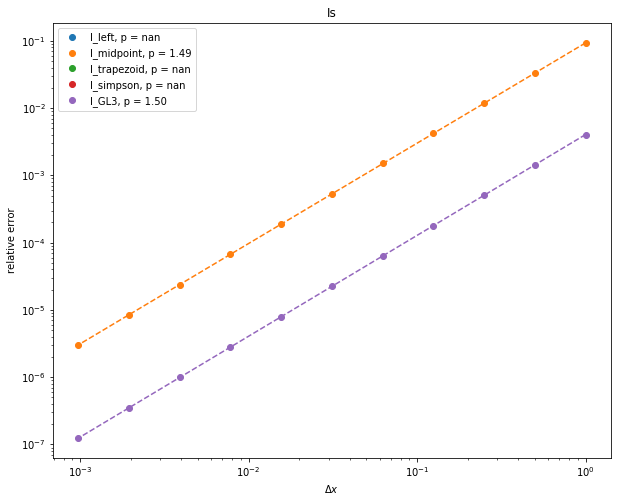

In [27]:
c = lambda x: numpy.cos(x)/numpy.sqrt(x)
s = lambda x: numpy.sin(x)/numpy.sqrt(x)

N = [2**n for n in range (11)]
plot_quad_convergence(c, 0., 1., N, Ic_true, 'Ic')
plot_quad_convergence(s, 0., 1., N, Is_true, 'Is')

**(c)**  [4] Explain the results of your plots

Only the midpoint and GL3 method are able to actually approximate the integral. This because these two methods use middle points to caclulate the integral, thereby not ancountering the singularity at 0. The other methods sample the edge points at the singularity—which ends up returning an inf (and the rest of the points are adding to inf). 

The errors for Ic are much larger but both graphs show suboptimal rates of convergence. 

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results


    Ic:
    
$$ I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx $$

Parametrize with $x = t^2$

$$ I_c = \int^1_0 \frac{\cos t^2}{\sqrt{t^2}} 2t dt $$

$$ I_c = \int^1_0 \frac{\cos t^2}{t} 2t dt $$

$$ I_c = \int^1_0 2\cos t^2 dt $$

$$ I_c = 2\int^1_0 \cos t^2 dt $$

    Is:

$$ I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx $$

Parametrize with $x = t^2$

$$ I_s = \int^1_0 \frac{\sin t^2}{\sqrt{t^2}} 2t dt $$

$$ I_s = \int^1_0 \frac{\sin t^2}{t} 2t dt $$

$$ I_s = \int^1_0 2\sin t^2 dt $$

$$ I_s = 2\int^1_0 \sin t^2 dt $$





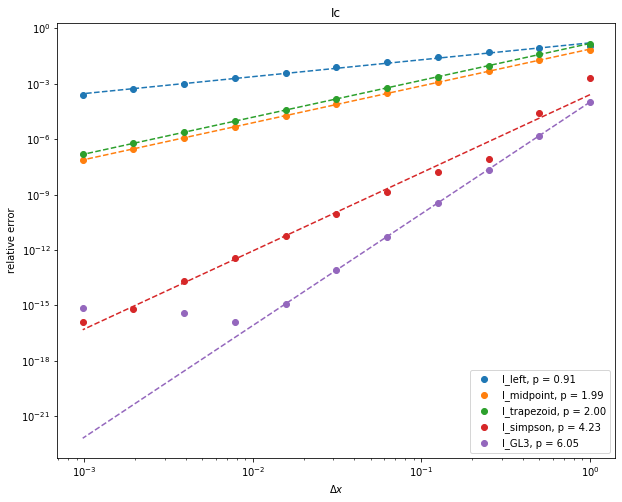

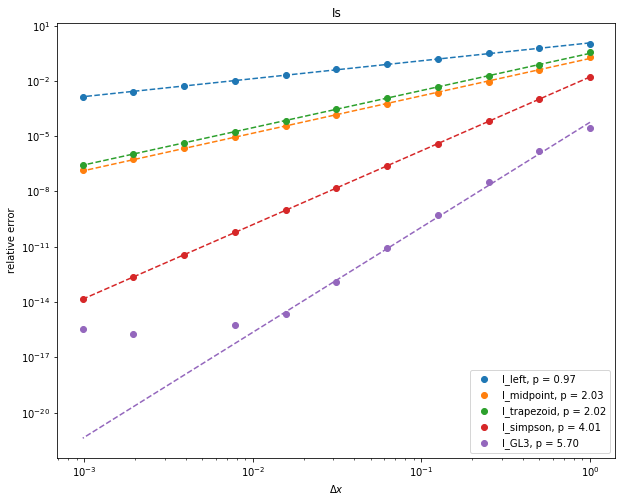

In [28]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

c = lambda t: 2 * numpy.cos(t ** 2)
s = lambda t: 2 * numpy.sin(t ** 2)

N = [2**n for n in range (11)]
plot_quad_convergence(c, 0., 1., N, Ic_true, 'Ic')
plot_quad_convergence(s, 0., 1., N, Is_true, 'Is')

After the transformation, the singularity at x = 0 no longer exists for cos so the function is now "well behaved" so that we can estimate both functions pretty well. Clearly GL3 is the most accurate method to calculate these functions. 

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.  For the following problem, assume that the data considered are equispaced points $(x_i, y_i)$, i.e. $\Delta x$ is uniform.  

Here we will construct a matrix   $D$  such that multiplying a vector of $\mathbf{y}$ values would lead to a second order approximation of the First derivative for the given data. 

In other words for  $y_i = f(x_i)$

$$
f'(x) \approx D\mathbf{y}
$$

**(a)** [8] Derive the forward, centered and  backward second order finite difference approximations to the first derivative using the method of your choice.

I.e. given 3 equispaced points $x_i, x_{i+1}, x_{i+2}$  calculate the consistent 2nd order, *1st derivative* operator evaluated at each point.  

* hint 1:  consider the interpolating polynomial $P_2(x)$ through those 3 points and calculate $P'_2(x)$ at each point.
* hint 2:  the method of undetermined coefficients on Taylor's series can be useful here as well

**Extra Credit**: Find the consistent 2nd order *2nd derivative* evaluated at each point

All discrete approximations to derivatives are linear combinations of functional values at the nodes:

$$ f_i^p = \frac{a\alpha f\alpha + a\beta f\beta + \dots + a\mu f\mu}{h^p} + E $$

Forward second order accurate approximation to the first derivative requires: 

    forward difference formula for fi(1) that is accurate up to E = O(h)^2
    
Therefore: 
    
    Lets reference this equation as eq1 in the future: 

$$ E = \frac{\alpha_1 f_i + \alpha_2 f_{i + 1} + \alpha_3 f_{i + 2} }{h}$$

Taylor Series expansions about $x_i$ are:

$$ f_i = f_i $$

$$ f_{i + 1} = f_i + hf_i^{(1)} + \frac{h^2}{2}f_i^{(2)} + \frac{h^3}{6}f_i^{(3)} + O(h)^4 $$

$$ f_{i + 2} = f_i + 2hf_i^{(1)} + 2h^2f_i^{(2)} + \frac{4}{3}h^3f_i^{(3)} + O(h)^4 $$

Substituting into our assumed form of $f_i^1$ and re-arranging

$$ \frac{\alpha_1 f_i + \alpha_2 f_{i + 1} + \alpha_3 f_{i + 2} }{h} = $$

$$ \frac{(\alpha_1 + \alpha_2 + \alpha_3)}{h}f_i + (\alpha_2+ 2\alpha_3)f_i^{(1)} + (\frac{\alpha_2}{2} + 2\alpha_3)hf_i^{(2)} + (\frac{1}{6} \alpha_2 + \frac{4}{3}\alpha_3)h^2f_i^{(3)} + O(h)^3$$

We can set a system of equations to solve for $\alpha_1, \alpha_2, \alpha_3$

$$ \frac{\alpha_1 + \alpha_2 + \alpha_3}{h} = 0 $$

$$ \alpha_2+ 2\alpha_3 = 1 $$

$$ \frac{\alpha_2}{2} + 2\alpha_3 = 0$$

    Which gives us: 

$$ \alpha_1 = -\frac{3}{2} $$

$$ \alpha_2 = 2 $$

$$ \alpha_3 = -\frac{1}{2} $$

Now we plug in the values into eq1 and manipulate the equation

    We get that the forward difference is:

$$ f_1^{(1)} = \frac{-3f_i + 4f_{i + 1} - f_{i + 2}}{2h} $$

    We can use the same coefficients for the backwards difference: 
    
$$ f_1^{(1)} = \frac{3f_i - 4f_{i - 1} + f_{i - 2}}{2h} $$


For the central difference we will subtract the backward's difference from the forward difference
    
    We discover that the central difference is: 
    
$$ f_1^{(1)} = \frac{f_{i + 1} - f_{i - 1}}{2h} $$


**(b)** [4] Now consider an equispaced set of points  $y_i = f(x_i)$, can you describe the structure of a consistent 2nd order, first derivative matrix $D$,  such that 

$$
    f'(x) \approx D\mathbf{y}
$$

returns the consistent 1st derivative at every point (including the end points)

Building the matrix D row by row: 

    The first row must account for the fact that there are no points to the left of the graph. Hence, we use the forward difference equation we found earlier. 
    
$$  \frac{1}{2h} \begin{bmatrix}
    -3 & 4 & -1 & \dots & 0 \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
    \end{bmatrix}
$$    

    For the rest of the points, except the very last, the 1st derivative can be found using the centeral difference formula derived in the previous problem. 
    
$$  \frac{1}{2h} \begin{bmatrix}
    -3 & 4 & -1 & \dots & 0 \\
    -1 & 0 & 1 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
    \end{bmatrix}
$$    

    However, notice that when we move towards subsequent points, we are utilizing new points and disregarding previous points. This means that every new derivative needs to be calculating with the next point. So the "middle" rows will look as such:
    
$$  \frac{1}{2h} \begin{bmatrix}
    -3 & 4 & -1 & 0 & 0 & 0 & 0 & \dots & 0 \\
    -1 & 0 & 1 & 0 & 0 & 0 & 0 & \dots  & 0 \\
    0 & -1 & 0 & 1 & 0 & 0 & 0 & \dots  & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 &\dots  & 0 \\
    0 & 0 & 0 & -1 & 0 & 1 & 0 &\dots  & 0 \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3}  & x_{d4} & x_{d5} & x_{d6} & x_{d7} & x_{d8} & \dots 
    \end{bmatrix}
$$
    
    Finally, for the final point, we know that there will be no points to the right of the point at which we want to calculate the derivative. Hence, we must use the backwards difference formula. 
    
$$  \frac{1}{2h} \begin{bmatrix}
    -3 & 4 & -1 & 0 & 0 & 0 & 0 & \dots & 0 \\
    -1 & 0 & 1 & 0 & 0 & 0 & 0 & \dots  & 0 \\
    0 & -1 & 0 & 1 & 0 & 0 & 0 & \dots  & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 &\dots  & 0 \\
    0 & 0 & 0 & -1 & 0 & 1 & 0 &\dots  & 0 \\
    0 & 0 & 0 & 0 & -1 & 0 & 1 &\dots  & 0 \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & -4 & 3 
    \end{bmatrix}
$$
    



    
    

**(c)** [8] Write a function that takes in the number of data points $N$ and returns the matrix $D$ (which is a 2-D numpy array of size $N\times N$).  Here assume we are on the interval $[-1, 1]$.  Note that inside your function 
$$
    \Delta x = \frac{2}{N - 1}
$$
to match the `linspace` command.

Beyond being convenient (once you construct the matrix you can apply it to any set of data) this operation is much faster than using loops.  *Hint:* The command `numpy.diag` may be extremely helpful.

In [ ]:
def diff_matrix(N):
    
    if(N < 3):
        raise ValueError('You have not supplied sufficient points to approximate the integral') 
    
    D = numpy.zeros([N, N], dtype = int)
    
    # first row  
    D[0, 0] = -3
    D[0, 1] = 4
    D[0, 2] = -1
    
    # last row 
    D[N - 1, N - 1] = 3
    D[N - 1, N - 2] = -4
    D[N - 1, N - 3] = 1
    
    i = 1
    j = 0 
    
    while i is not N - 1:
        D[i, j] = -1
        D[i, j + 2] = 1
        
        j += 1
        i += 1
        
    x = (N - 1) / 4
    D = D * x
    
    return D

In [ ]:
# Let's test this using f(x) = exp(2.*x) and 100 points

N = 100
x = numpy.linspace(-1, 1, N)
y = numpy.exp(2.0 * x)
y_prime = 2.*numpy.exp(2. * x)

numpy.testing.assert_allclose(numpy.dot(diff_matrix(N), y), y_prime, rtol=1e-2)
print("Success!")

**(c)** [4] Suppose we knew the *first derivative* of a function $f(x)$ at a discrete set of points and wanted to solve for the discrete function itself.  i.e.  ideally given $D$ and vector $\mathbf{y} = f'(\mathbf{x})$,  we would like to be able to solve the linear algebra problem

$$
    D\mathbf{f} = \mathbf{y}
$$

for $\mathbf{f}\approx f(\bf{x})$.  Discuss any issues we might have with this approach.

Our D matrix currently has a (non-trivial) null space which means that D is not invertible. We also only know f up to a constant, and that constant is a null space. To make unique solutions we need at least one more constraint in terms of the boundery or we need an initial condition that will make D invertible. 